In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# For MAC with SSL error see: https://github.com/tensorflow/tensorflow/issues/33285
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Each row in x_train is a 28x28 image with 784 pixels
# Normalize the data
# 225 is the max value of a pixel, we divide by 255 to get a value between 0 and 1 
# 0 is black, 1 is white
x_train, x_test = x_train / 255.0, x_test / 255.0

# number of training data
ndata_train = x_train.shape[0]
# number of test data
ndata_test = x_test.shape[0]

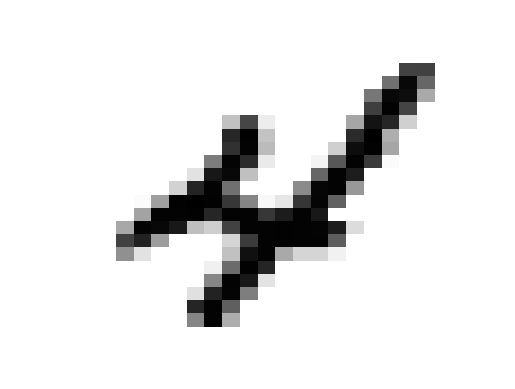

In [30]:
# Plot 10th image in the training set
plt.pcolor( 1-x_train[9,::-1,:] , cmap = 'gray' );
plt.axis('off');

In [31]:
# The actual label for the 10th image
y_train[9]

4

In [32]:
# Reshape the data to 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# We have only one color channel for gray-scale images
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

# Find the shape of input images
# Index 0 is the number of images, index 1 is the number of rows, index 2 is the number of columns, index 3 is the number of channels
# Here we only want the shape of the images and the number of channels, so we will use index 1 and 3
xshape = x_train.shape[1:4]
xshape


(28, 28, 1)

In [33]:
NNmodel = tf.keras.models.Sequential([
        # input layer, we flatten the 28x28 image into a 784 vector
        tf.keras.layers.Flatten(input_shape=xshape),
        # relu good for deep hidden layers
        tf.keras.layers.Dense(64,activation=tf.nn.relu),
        # sigmoid is also okay if not too many layers
        tf.keras.layers.Dense(64,activation=tf.nn.sigmoid),
        # softmax is good for output layer, left with 10 numbers that sum to 1
        # gives probability of each number
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [34]:
# sparse_categorical_crossentropy is good for classification with multiple classes
# sparse because we only have numbers from 0 to 9
NNmodel.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

NNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
# batch_size is the number of images to use for each gradient descent step
# epochs is the number of times to go through the entire training set
NNmodel.fit(x_train,y_train,epochs=12,validation_split=0.2,batch_size=200)

Epoch 1/12
240/240 [==============================] - 2s 7ms/step - loss: 0.8501 - accuracy: 0.7994 - val_loss: 0.3416 - val_accuracy: 0.9137
Epoch 2/12
240/240 [==============================] - 2s 9ms/step - loss: 0.3011 - accuracy: 0.9186 - val_loss: 0.2434 - val_accuracy: 0.9316
Epoch 3/12
240/240 [==============================] - 2s 8ms/step - loss: 0.2254 - accuracy: 0.9360 - val_loss: 0.1931 - val_accuracy: 0.9464
Epoch 4/12
240/240 [==============================] - 2s 7ms/step - loss: 0.1827 - accuracy: 0.9475 - val_loss: 0.1666 - val_accuracy: 0.9535
Epoch 5/12
240/240 [==============================] - 2s 6ms/step - loss: 0.1535 - accuracy: 0.9561 - val_loss: 0.1514 - val_accuracy: 0.9557
Epoch 6/12
240/240 [==============================] - 2s 6ms/step - loss: 0.1312 - accuracy: 0.9621 - val_loss: 0.1341 - val_accuracy: 0.9614
Epoch 7/12
240/240 [==============================] - 2s 6ms/step - loss: 0.1117 - accuracy: 0.9680 - val_loss: 0.1221 - val_accuracy: 0.9643
Epoch 

In [36]:
# Evaluate returns the classification accuracy
print('This model predicts '+str(NNmodel.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 2s 5ms/step - loss: 0.0950 - accuracy: 0.9711
This model predicts 97.11000323295593% of the test data correctly


In [37]:
# Another way to evaluate the model
# Predict returns the probability of each class
pred_probs = NNmodel.predict(x_test)
pred_probs.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [38]:
# Total of 10 probabilities for each image sum to 1
np.sum(pred_probs[0,:])

1.0

In [39]:
# Find the class with the highest probability
# Axis 0 is the image number, axis 1 is the class number
pred_class = np.argmax(pred_probs, axis=1)
# Compare with the true class, and take the mean to get the accuracy
np.mean(pred_class==y_test)

0.9711

In [40]:
# New model with convolutional layers and pooling layers
NNmodel2 = tf.keras.models.Sequential([
        # We pick the number of filters
        # We don't pick the pixel intensity, which is learned
        # Include filters layer
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        # Pooling layer
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        # Flatten the data for the dense layers, where we stack the filters together
        tf.keras.layers.Flatten(),
        # Dense layers
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dense(64,activation=tf.nn.softplus),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [41]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1440)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               184448    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                      

In [42]:
# batch_size is the number of images to use for each gradient descent step
# epochs is the number of times to go through the entire training set
NNmodel2.fit(x_train,y_train,epochs=5,validation_split=0.2,batch_size=500)

Epoch 1/5
96/96 [==============================] - 2s 20ms/step - loss: 0.7740 - accuracy: 0.7748 - val_loss: 0.1990 - val_accuracy: 0.9450
Epoch 2/5
96/96 [==============================] - 2s 19ms/step - loss: 0.1648 - accuracy: 0.9508 - val_loss: 0.1211 - val_accuracy: 0.9662
Epoch 3/5
96/96 [==============================] - 2s 19ms/step - loss: 0.1107 - accuracy: 0.9670 - val_loss: 0.1021 - val_accuracy: 0.9712
Epoch 4/5
96/96 [==============================] - 2s 18ms/step - loss: 0.0846 - accuracy: 0.9752 - val_loss: 0.0837 - val_accuracy: 0.9754
Epoch 5/5
96/96 [==============================] - 2s 19ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0843 - val_accuracy: 0.9762


In [43]:
# Evaluate returns the classification accuracy
print('This model predicts '+str(NNmodel2.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 2s 6ms/step - loss: 0.0718 - accuracy: 0.9767
This model predicts 97.67000675201416% of the test data correctly


In [44]:
# Using our new model to find the probability of each class
pred_probs2 = NNmodel2.predict(x_test)
# Find the class with the highest probability
pred2 = np.argmax(pred_probs2, axis=1)
# Compare with the true class, and take the mean to get the accuracy
# Better than the first model by about 1%
print(np.mean(pred2==y_test))

313/313 [==============================] - 1s 3ms/step
0.9767
